In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as e

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:

# to pull: git pull origin main
# to go to branch: git checkout dev_branch

In [3]:
# df = pd.read_csv('cws_residents.csv')

In [4]:
df = w.get_cws_data()

In [5]:
df.head()

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
0,3946,75.00,75.00,0,131,"Uncllctbl key, remote fees",136,"Uncllctbl key, remote fees",Current,1311,15,52500,False,666000,Accept,33,745,Insufficient period of Residence History,1
1,3962,13.66,13.66,0,112,Water 8/1/2021-9/1/2021,136,Utility-water charges,Current,1661,12,65000,False,889992,Accept with Conditions (Extra Deposit),27,758,No Credit Experience,0
2,4050,46.17,46.17,0,155,Damage charges - Clean,136,Damage charges,Current,1412,12,48000,False,576000,Accept with Conditions (Extra Deposit),33,666,Insufficient period of Residence History,1
3,4948,9.76,9.76,0,111,Sewer Charge,140,Utility-sewer charges,Current,1377,18,72000,False,0,A-Criminal History Meets Requirements,39,0,Meets All Property Requirements,0
4,5001,6.85,6.85,0,113,Sewer Base Charge,140,Utility-water flat base charges,Current,2199,13,0,True,54996,Accept with Conditions (Guarantor),23,752,NaN,0


In [6]:
df.shape

(4999, 19)

In [7]:
df.id.nunique()

4999

In [8]:
df.columns

Index(['id', 'total_charges', 'amount_paid', 'open', 'charge_code',
       'description', 'prop_id', 'charge_name', 'sStatus', 'rent', 'term',
       'monthly_inc', 'GuarantorRequired', 'total_inc', 'Recommendation',
       'age', 'risk_score', 'reason', 'bad_resident'],
      dtype='object')

In [9]:
df.isnull().sum()

id                     0
total_charges          0
amount_paid            0
open                   0
charge_code            0
description            0
prop_id                0
charge_name            0
sStatus                0
rent                   0
term                   0
monthly_inc            0
GuarantorRequired      0
total_inc              0
Recommendation         0
age                    0
risk_score             0
reason               144
bad_resident           0
dtype: int64

In [10]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', strat ='bad_resident')

In [11]:
train.shape, validate.shape, test.shape

((2799, 19), (1200, 19), (1000, 19))

In [20]:
train.GuarantorRequired.value_counts()

False    2437
True      362
Name: GuarantorRequired, dtype: int64

In [21]:
train.bad_resident.value_counts()

0    2692
1     107
Name: bad_resident, dtype: int64

In [22]:
def vis_countplot(col, train):
    ''' takes in a column name and a dataframe and show countplot graph'''
    
    #plot countplot graph
    sns.countplot(x=col, hue='bad_resident', data=train)
    sns.despine()
    plt.title('Gurrantor Required relationship with Resident Type')
    plt.xlabel('Gurrantor Required')
    plt.show()

In [23]:
def chi_test(col, train):
    '''takes in a column name and a dataframe and runs chi-square test to compare relationship of bad_resident 
    with a datframe attributes 
    '''
    
    # set alpha value to 0.05
    alpha = 0.05
    
    # set null and alternative hypothesis 
    null_hypothesis = col + ' and bad_resident are independent'
    alternative_hypothesis = col + ' and bad_resident are dependent'

    # create an observed crosstab, or contingency table from a dataframe's two columns
    observed = pd.crosstab(train[col], train.bad_resident)

    # run chi-square test
    chi2, p, degf, expected = stats.chi2_contingency(observed)

    # print Null Hypothesis followed by a new line
    print(f'Null Hypothesis: {null_hypothesis}\n')

    # print Alternative Hypothesis followed by a new line
    print(f'Alternative Hypothesis: {alternative_hypothesis}\n')

    # print the chi2 value
    print(f'chi^2 = {chi2}') 

    # print the p-value followed by a new line
    print(f'p     = {p}\n')

    if p < alpha:
        print(f'We reject null hypothesis')
        print(f'There exists some relationship between {col} and bad_resident.')
    else:
        print(f'We fail to reject null hypothesis')
        print(f'There appears to be no significant relationship between {col} and bad_resident.')

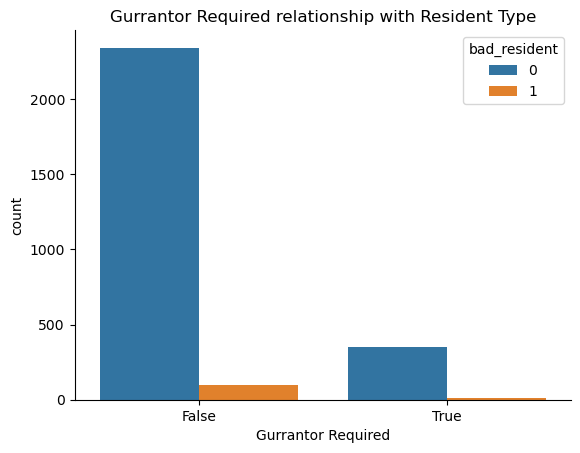

In [24]:
vis_countplot('GuarantorRequired', train)

In [25]:
chi_test('GuarantorRequired', train)

Null Hypothesis: GuarantorRequired and bad_resident are independent

Alternative Hypothesis: GuarantorRequired and bad_resident are dependent

chi^2 = 0.15460781387865227
p     = 0.6941702916474859

We fail to reject null hypothesis
There appears to be no significant relationship between GuarantorRequired and bad_resident.


In [104]:
train.GuarantorRequired.value_counts()

False    2437
True      362
Name: GuarantorRequired, dtype: int64

In [107]:
guarrantor_no = train[ (train.GuarantorRequired==False)]
guarrantor_no.head(3)

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
2707,63851,2.0,2.0,0,190,Pest control (02/2023),126,Pest control,Current,1639,12,3900,False,0,A-Criminal History Meets Requirements,27,0,Meets All Property Requirements,0
4983,73919,1650.0,1650.0,0,21,Deposit (Amounts subject to screening results),103,Deposit received,Current,1719,12,6600,False,75684,Accept with Conditions (Extra Deposit),31,745,NaN,0
4959,73653,4.0,4.0,0,180,Next Month's Administration Processing Fee,84,Administration processing fee,Current,1661,9,8176,False,221364,Accept with Conditions (Extra Deposit),37,687,Limited period of Employment History,0


In [108]:
guarrantor_no.bad_resident.value_counts()

0    2342
1      95
Name: bad_resident, dtype: int64

In [111]:
guarrantor_no[guarrantor_no.bad_resident==1].charge_name.value_counts()

Damage charges                 38
Uncllctbl Non Rent             26
Uncllctbl key, remote fees     13
Charges for cleaning needed    12
Uncllctbl cleaning, damages     3
Uncllctbl rent                  3
Name: charge_name, dtype: int64

In [112]:
guarrantor_yes = train[train.GuarantorRequired==True]
guarrantor_yes.head(3)

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
4807,72624,200.0,200.0,0,161,Administrative Fee (Alexis Coen),84,Administrative fee,Current,1829,12,7000,True,57936,Accept with Conditions (Guarantor),28,673,Insufficient Income to Support Rent,0
3988,68446,5.0,5.0,0,186,Convenience Fee (Amanda Hall),126,OSP resident convenience fee,Current,2089,15,1200,True,0,Accept with Conditions (Guarantor),43,613,Insufficient Income to Support Rent,0
3813,67552,5.0,5.0,0,186,Convenience Fee (Myles Hammon),63,OSP resident convenience fee,Current,1529,12,0,True,0,Accept with Conditions (Guarantor),22,734,Insufficient Income to Support Rent,0


In [113]:
guarrantor_yes.bad_resident.value_counts()

0    350
1     12
Name: bad_resident, dtype: int64

In [114]:
guarrantor_yes[guarrantor_yes.bad_resident==1].charge_name.value_counts()

Uncllctbl Non Rent             5
Damage charges                 4
Charges for cleaning needed    2
Uncllctbl cleaning, damages    1
Name: charge_name, dtype: int64

In [26]:
df.rent.nunique()

663

In [27]:
df.rent.mean()

1672.4164832966594

In [29]:
df.bad_resident.value_counts()

0    4808
1     191
Name: bad_resident, dtype: int64

In [28]:
rent_avg = round(df.rent.mean())
rent_avg 

1672

In [33]:
df.rent.min()

829

In [34]:
df.rent.max()

5574

In [30]:
df.sort_values('rent').head(7)

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
1334,45817,1041.00,1041.00,0,74,Rent (03/2023),66,Rent,Current,0,13,5500,False,66000,REJECT,31,604,Rental History Does Not Meet Property Requirem...,0
2417,62685,5.00,5.00,0,186,Convenience Fee (Matthew Cox),85,OSP resident convenience fee,Current,0,6,12916,False,154992,Accept,36,738,Meets All Property Requirements,0
1709,59984,37.64,37.64,0,112,Utility-water charges (02/2023),138,Utility-water charges,Current,0,7,5000,False,0,A-Meets Requirements,19,0,Meets All Property Requirements,0
2582,63492,5.00,5.00,0,190,Next Month's Pest Control,70,Pest control,Current,0,12,6000,False,72000,Accept with Conditions (Extra Deposit),32,606,High level of Charge-offs,0
1641,47151,-250.00,-250.00,0,155,Damage charges patio door repair,88,Damage charges,Current,100,6,100000,False,0,A-Meets Requirements,42,0,Meets All Property Requirements,1
3605,66810,3.00,3.00,0,180,Administration processing fee (03/2023),94,Administration processing fee,Current,829,15,2300,False,33480,Accept,27,672,Meets All Property Requirements,0
3077,65025,8.77,8.77,0,112,Water Charge,94,Utility-water charges,Current,879,14,1700,False,38748,Accept,25,678,Meets All Property Requirements,0


In [31]:
rent_avg = round(df.rent.mean())
df.loc[df["rent"] == 0, 'rent'] = rent_avg 
df.loc[df["rent"] == 100, 'rent'] = rent_avg 

In [32]:
df.sort_values('rent').head(7)

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
3605,66810,3.00,3.00,0,180,Administration processing fee (03/2023),94,Administration processing fee,Current,829,15,2300,False,33480,Accept,27,672,Meets All Property Requirements,0
3077,65025,8.77,8.77,0,112,Water Charge,94,Utility-water charges,Current,879,14,1700,False,38748,Accept,25,678,Meets All Property Requirements,0
3797,67475,0.39,0.39,0,113,Water Base Charge for 11 Days,94,Utility-water flat base charges,Current,879,13,3040,False,36480,Accept,19,674,Meets All Property Requirements,0
3796,67469,50.00,50.00,0,134,Non-Refundable Application Fee (Miguel Mar),94,Application fee,Current,889,13,3000,False,100800,Accept with Conditions (Extra Deposit),26,758,Limited period of Residence History,0
1298,45605,889.00,889.00,0,74,Rent (01/2023),94,Rent,Current,889,15,3281,False,39372,Accept,24,786,Meets All Property Requirements,0
3063,64969,12.00,12.00,0,129,Utility-trash charges (03/2023),94,Utility-trash charges,Current,899,13,3300,False,51636,Accept,28,675,Minor level of late credit payments,0
1736,60074,0.40,0.40,0,190,Pest Control for 3 days,93,Pest control,Current,899,12,4000,False,48000,Accept,26,584,Meets All Property Requirements,0


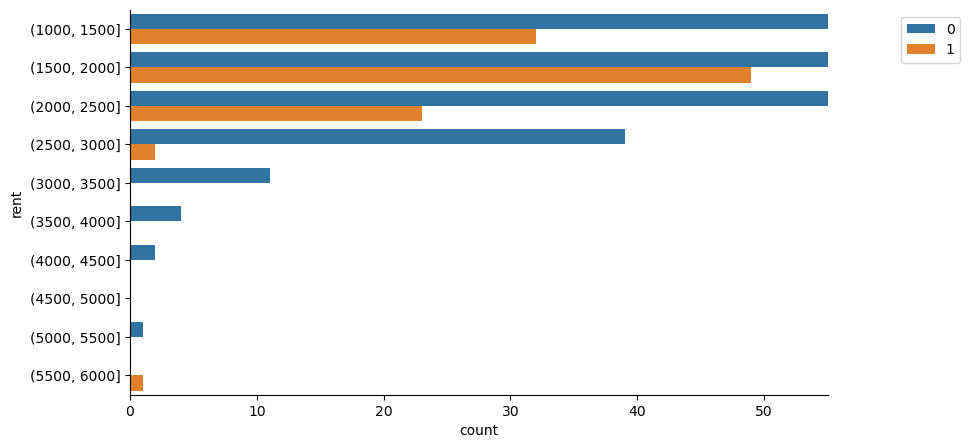

In [115]:
bins = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
rent_bin = pd.cut(train['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,hue='bad_resident',data=train)
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlim(0,55)
plt.show()

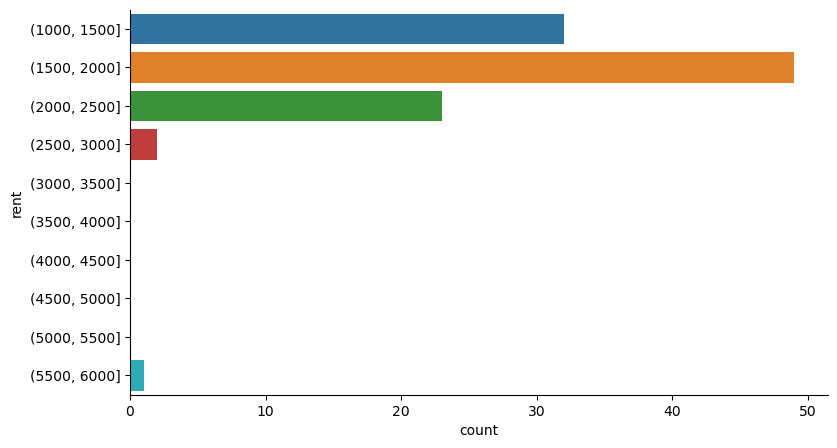

In [117]:
train_bad_resident = train[train['bad_resident']==1]
bins = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
rent_bin = pd.cut(train_bad_resident['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,data=train_bad_resident)
sns.despine()
# plt.xlim(0,5)
plt.show()

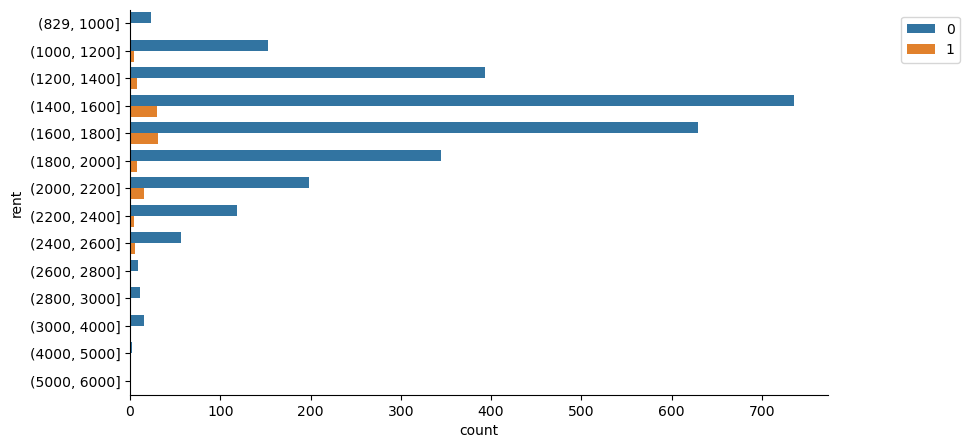

In [37]:
bins = [829,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,4000,5000,6000]
rent_bin = pd.cut(train['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,hue='bad_resident',data=train)
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.show()

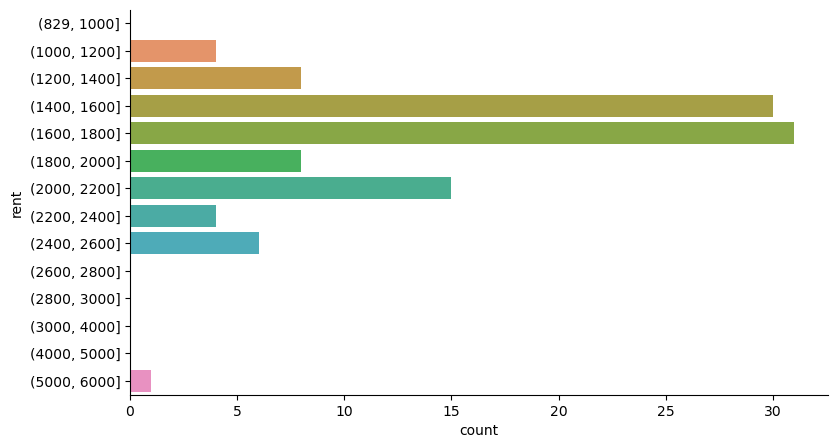

In [38]:
train_bad_resident = train[train['bad_resident']==1]
bins = [829,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,4000,5000,6000]
rent_bin = pd.cut(train_bad_resident['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,data=train_bad_resident)
sns.despine()
plt.show()

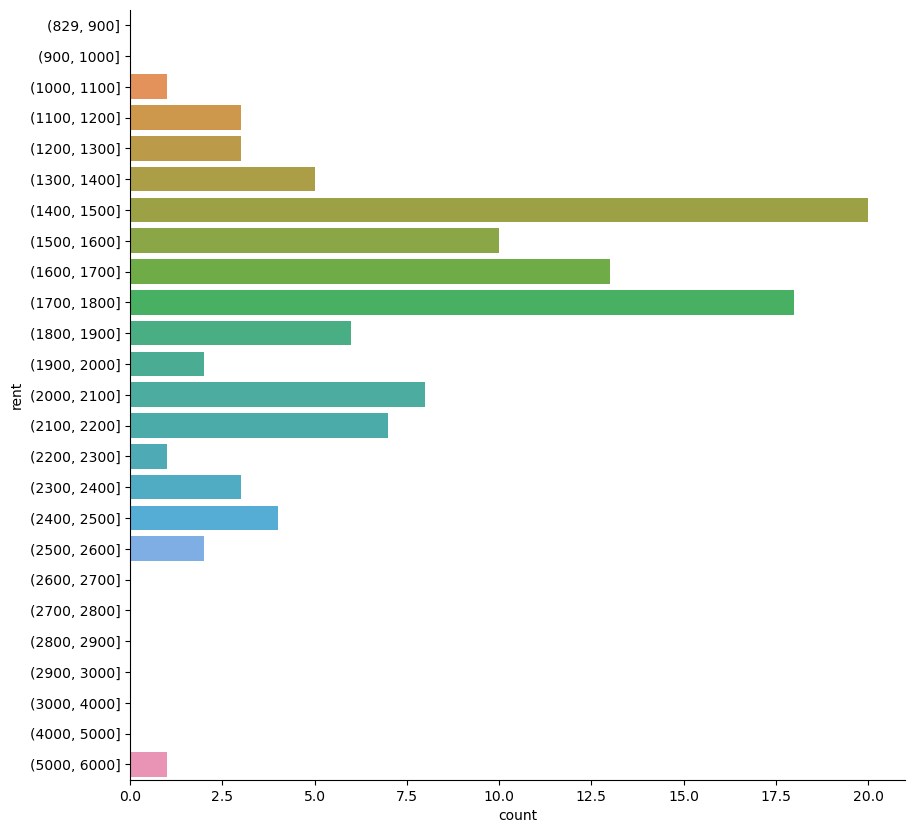

In [39]:
train_bad_resident = train[train['bad_resident']==1]
bins = [829,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,4000,5000,6000]
rent_bin = pd.cut(train_bad_resident['rent'], bins = bins)
plt.figure(figsize=(10, 10))
sns.countplot(y=rent_bin,data=train_bad_resident)
sns.despine()
plt.show()

In [74]:
def viz_rent():
    '''plot histogram'''
    
    bins = [829,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,4000,5000,6000]
    
    plt.figure(figsize=(8, 16))
    
    plt.subplot(211)
    rent_bin = pd.cut(train['rent'], bins = bins)
    sns.countplot(y=rent_bin,hue='bad_resident',data=train)
    sns.despine()
    plt.xlim(0,60)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.title('Relation of rent with Resident')
    
    plt.subplot(212)
    train_bad_resident = train[train['bad_resident']==1]
    rent_bin_bad = pd.cut(train_bad_resident['rent'], bins = bins)
    sns.countplot(y=rent_bin_bad,data=train_bad_resident)
    sns.despine()
    plt.title('Relation of rent with Bad Resident')
    

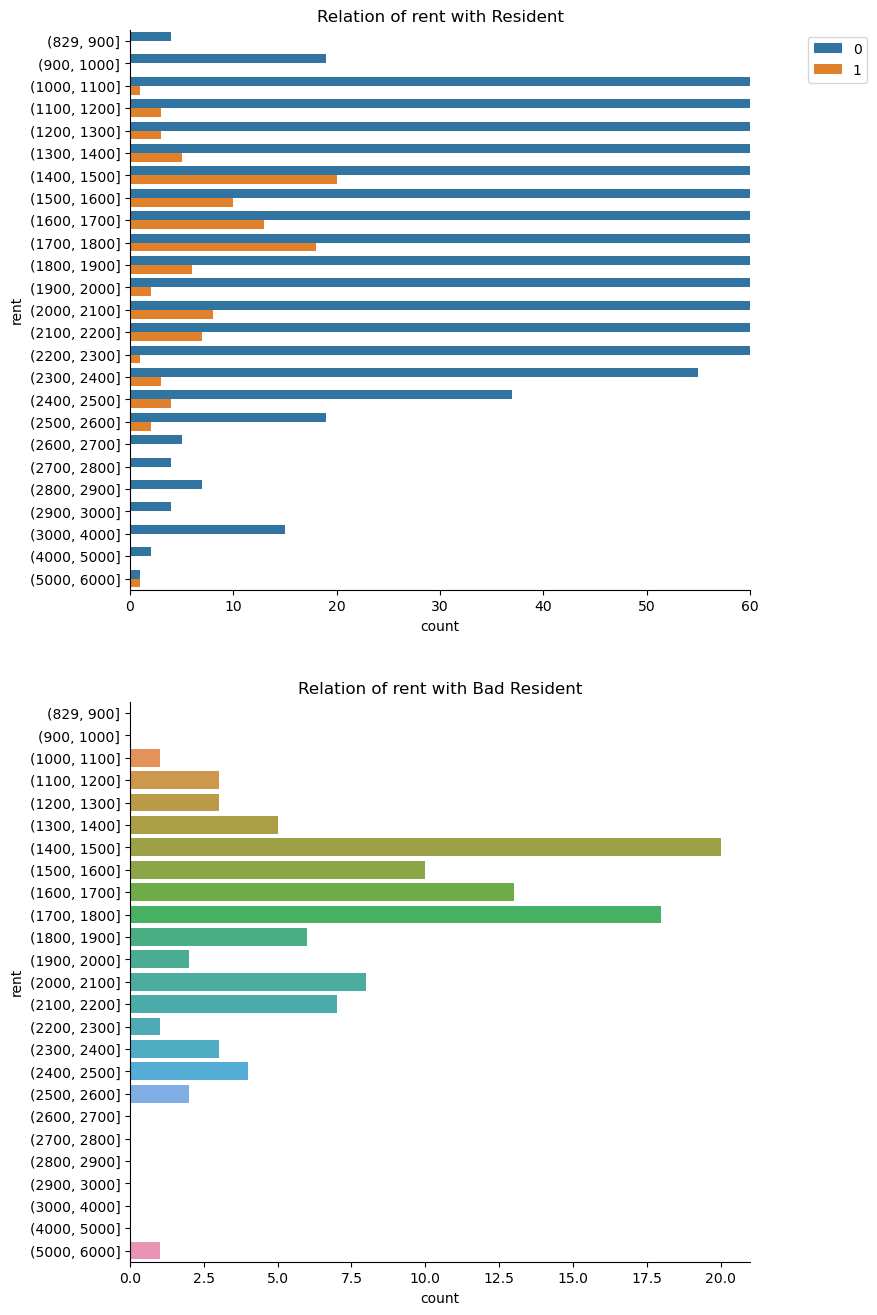

In [119]:
viz_rent()

In [42]:
df.isnull().sum()

id                     0
total_charges          0
amount_paid            0
open                   0
charge_code            0
description            0
prop_id                0
charge_name            0
sStatus                0
rent                   0
term                   0
monthly_inc            0
GuarantorRequired      0
total_inc              0
Recommendation         0
age                    0
risk_score             0
reason               144
bad_resident           0
dtype: int64

In [43]:
df_reason_null = df[df.reason.isnull()]
df_reason_null.bad_resident.value_counts()

0    139
1      5
Name: bad_resident, dtype: int64

In [44]:
df.reason.mode()

0    Meets All Property Requirements
Name: reason, dtype: object

In [45]:
df[df['bad_resident']==1].reason.mode()

0    Meets All Property Requirements
Name: reason, dtype: object

In [46]:
df[df['bad_resident']==0].reason.mode()

0    Meets All Property Requirements
Name: reason, dtype: object

In [47]:
print(df.reason.nunique())
reason_list_with_NAN = df.reason.unique().tolist()
reason_list_with_NAN

29


['Insufficient period of Residence History',
 'No Credit Experience',
 'Meets All Property Requirements',
 nan,
 'Insufficient period of Employment History',
 'Severe level of Charge-offs',
 'Severe Level of Collection Items',
 'Insufficient Income to Support Rent',
 'Limited Credit Experience',
 'Moderate level of late credit payments',
 'High Level of Collection Items',
 'Civil Court History Does Not Meet Property Requirements',
 'Judgment or collection from Apartment Community',
 'High level of Charge-offs',
 'Severe level of Judgments/Suits OR Repossession OR Voluntary Surrender',
 'Moderate Level of Collection Items',
 'Minor level of late credit payments',
 'Collection from Apartment Community',
 'Rental History Does Not Meet Property Requirements',
 'Limited period of Employment History',
 'Bankruptcy or Foreclosure',
 'Executive Approval',
 'Collection from Utility Provider',
 'High level of late credit payments',
 'Limited period of Residence History',
 'Minor Level of Collect

In [48]:
df.fillna('Meets All Property Requirements',inplace=True)

In [49]:
df.shape

(4999, 19)

In [50]:
df.isnull().sum()

id                   0
total_charges        0
amount_paid          0
open                 0
charge_code          0
description          0
prop_id              0
charge_name          0
sStatus              0
rent                 0
term                 0
monthly_inc          0
GuarantorRequired    0
total_inc            0
Recommendation       0
age                  0
risk_score           0
reason               0
bad_resident         0
dtype: int64

In [51]:
print(df.reason.nunique())
reason_list = df.reason.unique().tolist()
sorted(reason_list)

29


['Bankruptcy or Foreclosure',
 'Civil Court History Does Not Meet Property Requirements',
 'Collection from Apartment Community',
 'Collection from Utility Provider',
 'Criminal History Does Not Meet Property Requirements',
 'Executive Approval',
 'High Level of Collection Items',
 'High level of Charge-offs',
 'High level of Judgments/Suits OR Repossession OR Voluntary Surrender',
 'High level of late credit payments',
 'Insufficient Income to Support Rent',
 'Insufficient period of Employment History',
 'Insufficient period of Residence History',
 'Judgment or collection from Apartment Community',
 'Limited Credit Experience',
 'Limited period of Employment History',
 'Limited period of Residence History',
 'Meets All Property Requirements',
 'Minor Level of Collection Items',
 'Minor level of late credit payments',
 'Moderate Level of Collection Items',
 'Moderate level of late credit payments',
 'No Credit Experience',
 'Reasonable Accommodation',
 'Rental History Does Not Meet Pro

In [52]:
print(df.Recommendation.nunique())
recommendation_list = df.Recommendation.unique().tolist()
recommendation_list

10


['Accept',
 'Accept with Conditions (Extra Deposit)',
 'A-Criminal History Meets Requirements',
 'Accept with Conditions (Guarantor)',
 'REJECT',
 'Accept with Conditions (Max Deposit)',
 'A-Meets Requirements',
 'Qualified Guarantor',
 'Guarantor Not Qualified',
 'Accept with Extra Security Deposit']

In [53]:
x = df[df['bad_resident']==1].Recommendation.unique().tolist()
sorted(x)

['A-Criminal History Meets Requirements',
 'A-Meets Requirements',
 'Accept',
 'Accept with Conditions (Extra Deposit)',
 'Accept with Conditions (Guarantor)',
 'Accept with Conditions (Max Deposit)',
 'REJECT']

In [54]:
y = df[df['bad_resident']==0].Recommendation.unique().tolist()
sorted(y)

['A-Criminal History Meets Requirements',
 'A-Meets Requirements',
 'Accept',
 'Accept with Conditions (Extra Deposit)',
 'Accept with Conditions (Guarantor)',
 'Accept with Conditions (Max Deposit)',
 'Accept with Extra Security Deposit',
 'Guarantor Not Qualified',
 'Qualified Guarantor',
 'REJECT']

In [55]:
def prep_for_scale(df):
    '''takes in a dataframe, create a copy of a dataframe, drop unwanted columns, create dummies, concate dataframe
    with dummies, split a dataframe, and return X_train, X_val, X_test'''
    
    df_1 = df.copy()
    df_1.drop(columns=['open', 'charge_code', 'description','charge_name','age','sStatus', 'reason' ], inplace=True)
    df_1['GuarantorRequired']= np.where(df_1['GuarantorRequired'], 1,0)
    
    dummies_1 = pd.get_dummies(df_1['Recommendation'])
#     dummies_2 = pd.get_dummies(df_1['reason'])
    df_1 = pd.concat([df_1, dummies_1], axis=1)
    df_1.drop(columns = ['Recommendation'],inplace=True)
    train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df_1, 'bad_resident', strat ='bad_resident')
    
    return X_train, X_val, X_test
    

In [56]:
# get X_train, X_val, X_test for scaling
X_train_s, X_val_s, X_test_s = prep_for_scale(df)

In [57]:
X_train_s.head(10)

,id,total_charges,amount_paid,prop_id,rent,term,monthly_inc,GuarantorRequired,total_inc,risk_score,A-Criminal History Meets Requirements,A-Meets Requirements,Accept,Accept with Conditions (Extra Deposit),Accept with Conditions (Guarantor),Accept with Conditions (Max Deposit),Accept with Extra Security Deposit,Guarantor Not Qualified,Qualified Guarantor,REJECT
2707,63851,2.00,2.00,126,1639,12,3900,0,0,0,1,0,0,0,0,0,0,0,0,0
4983,73919,1650.00,1650.00,103,1719,12,6600,0,75684,745,0,0,0,1,0,0,0,0,0,0
4959,73653,4.00,4.00,84,1661,9,8176,0,221364,687,0,0,0,1,0,0,0,0,0,0
4492,70961,0.33,0.33,80,1579,14,5000,0,101976,782,0,0,1,0,0,0,0,0,0,0
995,33019,1.17,1.17,139,1779,13,7500,0,90000,724,0,0,1,0,0,0,0,0,0,0
3515,66490,-6.36,-6.36,119,1659,15,6000,0,72000,0,0,0,0,1,0,0,0,0,0,0
2817,64196,22.91,22.91,144,1779,4,8000,0,78096,706,0,0,0,1,0,0,0,0,0,0
2220,62058,6.00,6.00,99,1419,12,5400,0,146232,503,0,0,1,0,0,0,0,0,0,0
4049,68778,696.43,696.43,97,1229,12,7300,0,227004,664,0,0,1,0,0,0,0,0,0,0
1533,46601,4.00,4.00,144,1629,14,7500,0,90000,666,0,0,1,0,0,0,0,0,0,0
